In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
/bin/rm -rf ./param/*par
mkdir -p ./param
ASCDS_WORK_PATH=./


## Download

In [2]:
/bin/rm -rf 2313 12220 
download_chandra_obsid 2313,12220 --exclude vvref,osol,eph1,evt2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      178 Mb  ####################            3 s  63059.2 kb/s
  asol     fits       29 Mb  ####################          < 1 s  66135.5 kb/s
  mtl      fits        5 Mb  ####################          < 1 s  47908.7 kb/s
  stat     fits        4 Mb  ####################          < 1 s  40943.2 kb/s
  aqual    fits        2 Mb  ####################          < 1 s  46669.3 kb/s
  bias     fits      430 Kb  ####################          < 1 s  11041.1 kb/s
  bias     fits      429 Kb  ####################          < 1 s  20330.3 kb/s
  bias     fits      427 Kb  ####################          < 1 s  21649.1 kb/s
  bias     fits      423 Kb  ####################          < 1 s  15392.0 kb/s
  bias     fits      422 Kb  ####################          < 1 s  20125.9 kb/s
  cntr_img jpg       419 Kb  ####################    

In [3]:
chandra_repro 2313 out= clob+


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/reproject_aspect/2313'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/reproject_aspect/2313/repro/acisf02313_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/reproject_aspect/2313/repro/acisf02313_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocesse

In [4]:
chandra_repro 12220 out= clob+


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/reproject_aspect/12220'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/reproject_aspect/12220/repro/acisf12220_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/reproject_aspect/12220/repro/acisf12220_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reproce

In [5]:
dmkeypar 2313/repro/acisf02313_repro_evt2.fits ONTIME echo+

132129.29851422


In [6]:
dmkeypar 12220/repro/acisf12220_repro_evt2.fits ONTIME echo+

48770.336169183


## Run Wavdetect on obsid 12220

In [7]:
fluximage 12220/repro/acisf12220_repro_evt2.fits cdfs12220 bin=1 \
  band=broad clob+

Running fluximage
Version: 04 November 2021

Using CSC ACIS broad science energy band.
Aspect solution 12220/repro/pcadf12220_000N001_asol1.fits found.
Bad-pixel file 12220/repro/acisf12220_repro_bpix1.fits found.
Mask file 12220/repro/acisf12220_000N003_msk1.fits found.

The output images will have 3833 by 3339 pixels, pixel size of 0.492 arcsec,
    and cover x=2646.5:6479.5:1,y=2277.5:5616.5:1.

Running tasks in parallel with 4 processors.
Creating 5 aspect histograms for obsid 12220
Creating 5 instrument maps for obsid 12220
Creating 5 exposure maps for obsid 12220
Combining 5 exposure maps for obsid 12220
Thresholding data for obsid 12220
Exposure-correcting image for obsid 12220

The following files were created:

 The clipped counts image is:
     cdfs12220_broad_thresh.img

 The observation FOV is:
     cdfs12220.fov

 The clipped exposure map is:
     cdfs12220_broad_thresh.expmap

 The exposure-corrected image is:
     cdfs12220_broad_flux.img



In [8]:
mkpsfmap cdfs12220_broad_thresh.img cdfs12220_broad_thresh.psfmap energy=2.3 \
  ecf=0.9 mode=h clob+

In [9]:
punlearn wavdetect
wavdetect \
  infile=cdfs12220_broad_thresh.img \
  psffile=cdfs12220_broad_thresh.psfmap \
  expfile=cdfs12220_broad_thresh.expmap \
  scales="1 2 4 6 8 12 16 24 32" \
  outfile=cdfs12220_broad.src \
  scell=cdfs12220_broad.cell \
  imagefile=cdfs12220_broad.recon \
  defnbkg=cdfs12220_broad.nbkg \
  interdir=./ mode=h clob+

[1] 14220
[1]+  Done                    ds9 cdfs12220_broad_thresh.img -scale log -block 4 -region cdfs12220_broad.src -saveimage png ds9_01.png


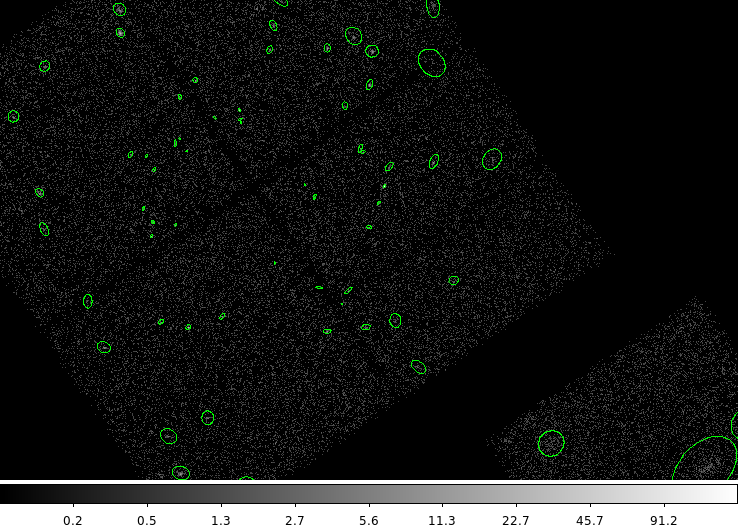

In [10]:
ds9 cdfs12220_broad_thresh.img -scale log -block 4 \
  -region cdfs12220_broad.src \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

## External catalog


In [25]:
cat << EOM > wav12220_point.reg
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
EOM

dmlist "cdfs12220_broad.src[cols ra,dec]" data,clean | \
grep -v "#" | \
awk '{print "point("$1","$2") # point=cross color=red"}' >> wav12220_point.reg


[1] 17683
[1]+  Done                    ds9 cdfs12220_broad_thresh.img -block 4 -scale log -catalog ua2 -catalog symbol color cornflowerblue -catalog export tsv usno_a2.tsv -region wav12220_point.reg -saveimage png ds9_02.png


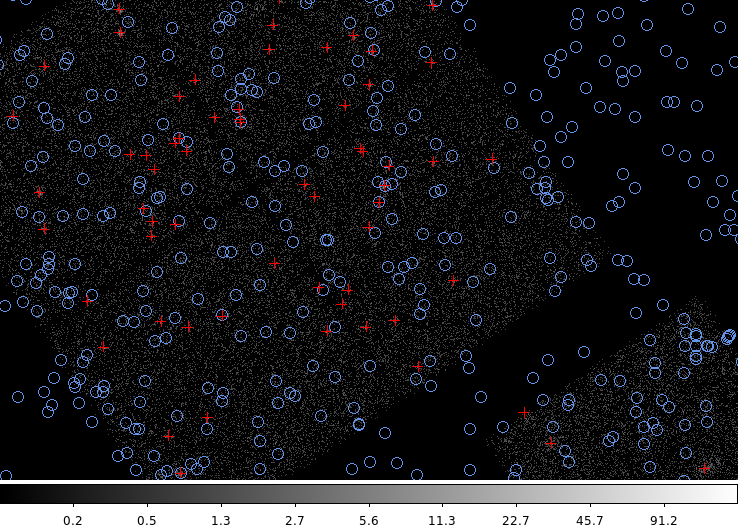

In [26]:
ds9 cdfs12220_broad_thresh.img -block 4 -scale log \
  -catalog ua2 \
  -catalog symbol color cornflowerblue -catalog export tsv usno_a2.tsv  \
  -region format ds9 \
  -region wav12220_point.reg \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

In [13]:
head -5 usno_a2.tsv

_RAJ2000	_DEJ2000	USNO-A2.0	RAJ2000	DEJ2000	ACTflag	Mflag	Bmag	Rmag	Epoch
052.77165300	-27.84893100	0600-01389895	052.771653	-27.848931			19.6	17.8	1983.246
052.77216200	-27.81999500	0600-01389915	052.772162	-27.819995			18.9	17.1	1983.246
052.77362000	-27.81208100	0600-01389964	052.773620	-27.812081			20.3	18.1	1983.246
052.77406400	-27.86205300	0600-01389981	052.774064	-27.862053			20.4	18.1	1983.246


In [14]:
dmlist "usno_a2.tsv[opt skip=1]" cols

 
--------------------------------------------------------------------------------
Columns for Table Block usno_a2.tsv
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   col1                              Real8          -Inf:+Inf            
   2   col2                              Real8          -Inf:+Inf            
   3   col3                              String[13]                          
   4   col4                              Real8          -Inf:+Inf            
   5   col5                              Real8          -Inf:+Inf            
   6   col6                              String[4]                           
   7   col7                              Real8          -Inf:+Inf            
   8   col8                              Real8          -Inf:+Inf            


In [15]:
pset wcs_match infile=cdfs12220_broad.src
pset wcs_match refsrcfile="usno_a2.tsv[opt skip=1][cols ra=col1,dec=col2]"
pset wcs_match outfile=out.xform
pset wcs_match wcsfile=cdfs12220_broad_thresh.img 
pset wcs_match method=trans
wcs_match mode=h clob+


# wcs_match (CIAO 4.14): WARNING: Ref src x_err or ra_err cols not found.  Assuming x_err = 1.
# wcs_match (CIAO 4.14): WARNING: Ref src y_err or dec_err cols not found.  Assuming y_err = 1.


In [16]:
dmlist out.xform cols

 
--------------------------------------------------------------------------------
Columns for Table Block XFM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   a11                               Real8          -Inf:+Inf            Transform Matrix element A11
   2   a12                               Real8          -Inf:+Inf            Transform Matrix element A12
   3   a21                               Real8          -Inf:+Inf            Transform Matrix element A21
   4   a22                               Real8          -Inf:+Inf            Transform Matrix element A22
   5   t1                                Real8          -Inf:+Inf            Transform Matrix element T1
   6   t2                                Real8          -Inf:+Inf            Transform Matrix element T2
   7   ra_ref               deg          Real8          -Inf:+Inf            WCS tangent point RA
   8   dec_

In [17]:
dmlist out.xform"[cols a11,a12,a21,a22,t1,t2]" data,clean

#  a11                  a12                  a21                  a22                  t1                   t2
                  1.0                    0                    0                  1.0    -0.19426639288812     0.49610366114037


---
## A 2nd chandra obs

In [18]:
fluximage 2313/repro/acisf02313_repro_evt2.fits cdfs2313 \
  bin=1 band=broad clob+


Running fluximage
Version: 04 November 2021

Using CSC ACIS broad science energy band.
Aspect solution 2313/repro/pcadf02313_000N001_asol1.fits found.
Bad-pixel file 2313/repro/acisf02313_repro_bpix1.fits found.
Mask file 2313/repro/acisf02313_000N004_msk1.fits found.

The output images will have 3989 by 3179 pixels, pixel size of 0.492 arcsec,
    and cover x=1588.5:5577.5:1,y=2553.5:5732.5:1.

Running tasks in parallel with 4 processors.
Creating 5 aspect histograms for obsid 2313
Creating 5 instrument maps for obsid 2313
Creating 5 exposure maps for obsid 2313
Combining 5 exposure maps for obsid 2313
Thresholding data for obsid 2313
Exposure-correcting image for obsid 2313

The following files were created:

 The clipped counts image is:
     cdfs2313_broad_thresh.img

 The observation FOV is:
     cdfs2313.fov

 The clipped exposure map is:
     cdfs2313_broad_thresh.expmap

 The exposure-corrected image is:
     cdfs2313_broad_flux.img



In [19]:
mkpsfmap cdfs2313_broad_thresh.img cdfs2313_broad_thresh.psfmap \
  energy=2.3 ecf=0.9 mode=h clob+

In [20]:
punlearn wavdetect
wavdetect \
  infile=cdfs2313_broad_thresh.img \
  psffile=cdfs2313_broad_thresh.psfmap \
  expfile=cdfs2313_broad_thresh.expmap \
  scales="1 2 4 6 8 12 16 24 32" \
  outfile=cdfs2313_broad.src \
  scell=cdfs2313_broad.cell \
  imagefile=cdfs2313_broad.recon \
  defnbkg=cdfs2313_broad.nbkg \
  interdir=./ mode=h clob+


In [28]:
cat << EOM > wav2313_point.reg
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
EOM

dmlist "cdfs2313_broad.src[cols ra,dec]" data,clean | \
grep -v "#" | \
awk '{print "point("$1","$2") # point=x color=cornflowerblue"}' >> wav2313_point.reg


[1] 18609
[1]+  Done                    ds9 cdfs12220_broad_thresh.img -block 4 -scale log -region wav12220_point.reg -region wav2313_point.reg -saveimage png ds9_03.png


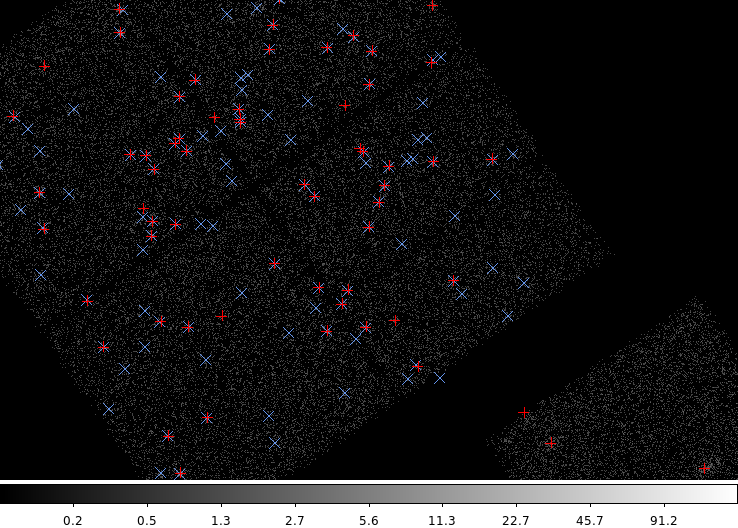

In [29]:
ds9 cdfs12220_broad_thresh.img -block 4 -scale log \
  -region format ds9 \
  -region wav12220_point.reg \
  -region wav2313_point.reg \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit


display < ds9_03.png


In [30]:
pset wcs_match infile=cdfs12220_broad.src
pset wcs_match refsrcfile=cdfs2313_broad.src
pset wcs_match outfile=out.xform
pset wcs_match wcsfile=cdfs12220_broad_thresh.img
pset wcs_match method=trans
wcs_match mode=h clob+

In [31]:
dmlist out.xform"[cols a11,a12,a21,a22,t1,t2]" data,clean

#  a11                  a12                  a21                  a22                  t1                   t2
                  1.0                    0                    0                  1.0     0.32384497821605     0.31594220488116


---

## Apply Corrections

In [32]:
pset wcs_update infile= 12220/repro/pcadf12220_000N001_asol1.fits
pset wcs_update outfile=pcadf12220_000N001_upd_asol1.fits
pset wcs_update transformfile=out.xform
pset wcs_update wcsfile=cdfs12220_broad_thresh.img
wcs_update mode=h clob+


In [33]:
dmdiff \
   12220/repro/pcadf12220_000N001_asol1.fits"[#row=1:3]" \
   pcadf12220_000N001_upd_asol1.fits"[#row=1:3]"  || echo ""

Infile 1:  12220/repro/pcadf12220_000N001_asol1.fits[#row=1:3]
Infile 2:  pcadf12220_000N001_upd_asol1.fits[#row=1:3]

----------------------------------------------------------------------
Compare Headers
----------------------------------------------------------------------
Compare Key Lists:
Compare Keyword Details:
# dmdiff (CIAO 4.14): WARNING: keyword 'CHECKSUM' comments differ.
# dmdiff (CIAO 4.14):   comment1="HDU checksum updated 2021-01-20T10:17:24"
# dmdiff (CIAO 4.14):   comment2="HDU checksum updated 2022-02-22T15:30:49"
# dmdiff (CIAO 4.14): WARNING: keyword 'DATASUM' comments differ.
# dmdiff (CIAO 4.14):   comment1="data unit checksum updated 2021-01-20T10:17:23"
# dmdiff (CIAO 4.14):   comment2="data unit checksum updated 2022-02-22T15:30:49"
Compare Keyword Values:
Keyword:  Message:                                                        Value(s):                    Diff:
--------- -------------------------------------- ---------------------------------- -------------

In [34]:
dmcopy 12220/repro/acisf12220_repro_evt2.fits \
  acisf12220_corrected_evt2.fits op=all clob+

In [35]:
pset wcs_update infile=acisf12220_corrected_evt2.fits
pset wcs_update outfile=
wcs_update mode=h clob+

In [36]:
dmdiff \
  12220/repro/acisf12220_repro_evt2.fits \
  acisf12220_corrected_evt2.fits || echo ""

Infile 1:  12220/repro/acisf12220_repro_evt2.fits
Infile 2:  acisf12220_corrected_evt2.fits

----------------------------------------------------------------------
Compare Headers
----------------------------------------------------------------------
Compare Key Lists:
Compare Keyword Details:
# dmdiff (CIAO 4.14): WARNING: keyword 'CHECKSUM' comments differ.
# dmdiff (CIAO 4.14):   comment1="HDU checksum updated 2022-02-22T15:03:49"
# dmdiff (CIAO 4.14):   comment2="HDU checksum updated 2022-02-22T15:35:15"
# dmdiff (CIAO 4.14): WARNING: keyword 'DATASUM' comments differ.
# dmdiff (CIAO 4.14):   comment1="data unit checksum updated 2022-02-22T15:03:34"
# dmdiff (CIAO 4.14):   comment2="data unit checksum updated 2022-02-22T15:35:15"
Compare Keyword Values:
Keyword: Message:                                                        Value(s):                    Diff:
-------- -------------------------------------- ---------------------------------- ------------------------
CHECKSUM Values 

In [37]:
dmlist 12220/repro/acisf12220_repro_evt2.fits header,clean,raw | grep CRVL

TCRVL5       = 0                    /                     
TCRVL6       = 0                    /                     
TCRVL9       = 0                    /                     
TCRVL10      = 0                    /                     
TCRVL11      =      53.11785338     /                     
TCRVL12      =     -27.80218822     /                     


In [38]:
dmlist acisf12220_corrected_evt2.fits header,clean,raw | grep CRVL

TCRVL5       = 0                    /                     
TCRVL6       = 0                    /                     
TCRVL9       = 0                    /                     
TCRVL10      = 0                    /                     
TCRVL11      =      53.11780335     /                     
TCRVL12      =     -27.80214504     /                     


In [39]:
dmhedit acisf12220_corrected_evt2.fits file= op=add key=ASOLFILE \
  value=pcadf12220_000N001_upd_asol1.fits

In [40]:
dmcopy cdfs2313_broad_flux.img cdfs2313_broad_flux.corrected.img op=all clob+

In [41]:
wcs_update cdfs2313_broad_flux.corrected.img outfile= trans=out.xform wcsfile=cdfs2313_broad_flux.img

---

## User offsets

[1] 20964
[1]+  Done                    ds9 cdfs12220_broad_thresh.img -zoom 4 -pan to 3840 3599 physical -regions command "physical;circle(3840,3599,7)" -scale log -saveimage png ds9_04.png


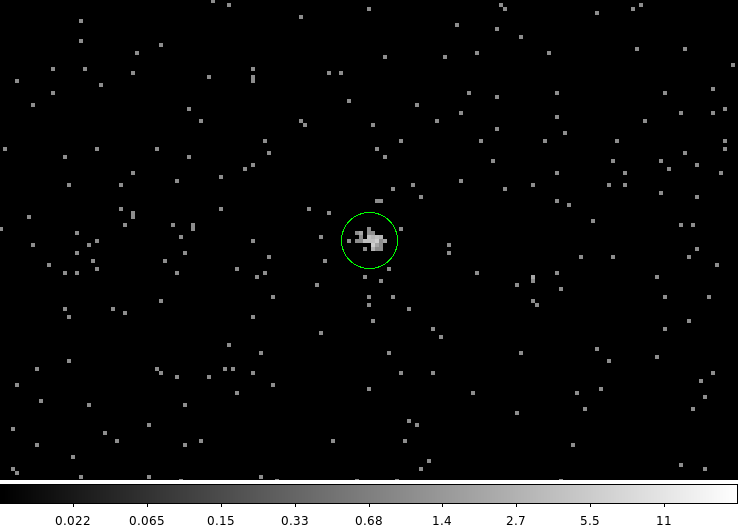

In [42]:
ds9 cdfs12220_broad_thresh.img -zoom 4 -pan to 3840 3599 physical \
  -region format ds9 \
  -region command "physical;circle(3840,3599,7)" -scale log \
  -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit


display < ds9_04.png

In [43]:
dmstat cdfs12220_broad_thresh.img"[sky=circle(3840,3599,7)]" cen+ sig- med-

EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 3840 3592 )
    max:	6 	      @:	( 3841 3598 )
cntrd[log] :	( 8.75 8.1166666667 )
cntrd[phys]:	( 3840.75 3599.1166667 )
   good:	149 
   null:	76 


In [44]:
punlearn dmcoords
dmcoords cdfs12220_broad_thresh.img op=sky x=3840.75 y=3599.11 verb=0 celfmt=deg 
pget dmcoords ra dec

53.15739196468656
-27.87015918504676


In [46]:
prop_precess f j/deg t j/hms eval 53.15739196468656 -27.87015918504676

Precess [Conversion mode]
Enter "q" to return to setup mode
--------------------------------------------------------------------------------
RA,Dec J2000.0                   53.157392   -27.870159
RA,Dec J2000.0                  03 32 37.77 -27 52 12.57
--------------------------------------------------------------------------------


### To coordinates

In [47]:
prop_precess from j/hms to j/deg p0 eval 03 32 38.0 -27 52 13.0

 53.158333   -27.870278


In [48]:
punlearn dmcoords
dmcoords cdfs12220_broad_thresh.img op=cel celfmt=hms ra=03:32:38.0 dec=-27:52:13.0 verb=0
pget dmcoords x y


3834.661168246338
3598.240259287044


### Let wcs_match do it

In [50]:
cat << EOM > obs.dat
#ra dec
53.15739196468656 -27.87015918504676
EOM


In [51]:
cat << EOM > usr.dat
#ra dec
53.158333   -27.870278
EOM

In [52]:
wcs_match in=obs.dat ref=usr.dat out=manual.xform wcs=cdfs12220_broad_thresh.img  clob+ method=trans verb=1

 input (dup) src file : obs.dat
 input ref src file   : usr.dat
 input wcsfile        : cdfs12220_broad_thresh.img
 debug level          : 1

1 common sources found between: 
usr.dat
obs.dat
After deleting poor matches, 1 sources remain

Source Residuals
----------------
 Match Ref# Dup#    Ref RA      Ref Dec.    Prior Resid           Transfm Resid         Resid  Incl
 Index              (deg.)      (deg.)      RSS (x,y)             RSS (x,y)             Ratio
                                            (arcsec)              (arcsec)
   0    0     0     53.15833   -27.87028    3.03 ( 2.99, 0.43)    0.00 (-0.00,-0.00)    0.00    Y

Source Residuals, before/after transform (arcsec), and percentage improvement:

   Average Residuals:         3.025176   0.000000  100.00%
   Maximum Residuals:         3.025176   0.000000  100.00%
   RMS Residuals:             2.139122   0.000000  100.00%

Source Residual Ratios, before/after transform, and percentage improvement:

   Average Residual Ratio

In [53]:
dmlist manual.xform data,clean 

#  a11                  a12                  a21                  a22                  t1                   t2                   ra_ref               dec_ref              roll_ref             xpix_ref             ypix_ref             x_scale              y_scale
                  1.0                    0                    0                  1.0        -6.0866750980    -0.87136601986367        53.1178533819       -27.8021882213                    0              4096.50              4096.50     -0.0001366666667      0.0001366666667


In [55]:
dmcopy cdfs12220_broad_thresh.img cdfs12220_broad_thresh.img.manual clob+
wcs_update cdfs12220_broad_thresh.img.manual none trans=manual.xform wcsfile=")infile" 

In [56]:
dmstat cdfs12220_broad_thresh.img"[sky=circle(3840,3599,7)]" cen+ sig- med-

EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 3840 3592 )
    max:	6 	      @:	( 3841 3598 )
cntrd[log] :	( 8.75 8.1166666667 )
cntrd[phys]:	( 3840.75 3599.1166667 )
   good:	149 
   null:	76 


In [64]:
punlearn dmcoords
dmcoords cdfs12220_broad_thresh.img.manual op=sky x=3840.75 y=3599.1166667 verb=0 celfmt=hms
pget dmcoords ra dec

03:32:37.999
-27:52:12.99


### Use offset parameters

Use compute the offsets as :  $ref - obs$

In [60]:
echo 3834.661168246338 - 3840.75  | bc -l
echo 3598.240259287044 - 3599.1166667 | bc -l

 

-6.088831753662
-.876407412956


In [61]:
dmcopy cdfs12220_broad_thresh.img cdfs12220_broad_thresh.img.manual_offsets clob+
wcs_update cdfs12220_broad_thresh.img.manual_offsets none trans= wcsfile=")infile" \
  deltax=-6.088831753662 deltay=-.876407412956

In [62]:
dmstat cdfs12220_broad_thresh.img"[sky=circle(3840,3599,7)]" cen+ sig- med-

EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 3840 3592 )
    max:	6 	      @:	( 3841 3598 )
cntrd[log] :	( 8.75 8.1166666667 )
cntrd[phys]:	( 3840.75 3599.1166667 )
   good:	149 
   null:	76 


In [65]:
punlearn dmcoords
dmcoords cdfs12220_broad_thresh.img.manual op=sky x=3840.75 y=3599.1166667 verb=0 celfmt=hms
pget dmcoords ra dec

03:32:37.999
-27:52:12.99


## Cleanup


In [ ]:
/bin/rm -rf 12220 2313
